In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns#visualization
sns.set(style="ticks", color_codes=True)
import matplotlib.ticker as mtick # For specifying the axes tick format 
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


To drop unnecessary datasets 

In [5]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis =1)

In [6]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Performing EDA Understanding the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


counting the unique values without duplication of same figure

In [8]:
print ("\nUnique values :  \n",df.nunique())



Unique values :  
 CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


The data types in the Data set

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Finding the Mean

In [10]:
df.groupby(['Exited']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


The above Mean calculation is one of the ways to understand the average of our data, this helps us to investigate any to note into our study whenever it is high or low measures it can noted so that all along the study helps us to avoid biases. the difference between Exited and un Exited are not that remarkable to give us a big picture of our study so any case can appear

Converting all the categorical variables into dummy variables

In [11]:
df1 = pd.get_dummies(df)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


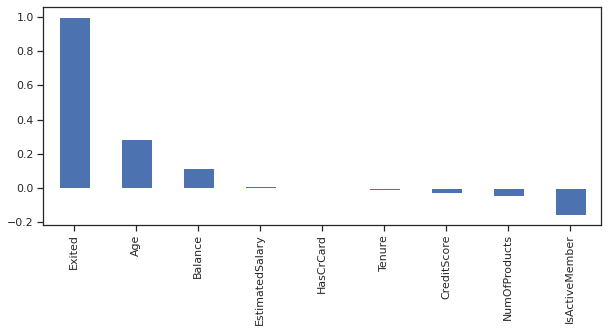

In [12]:
plt.figure(figsize=(10,4))
df.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

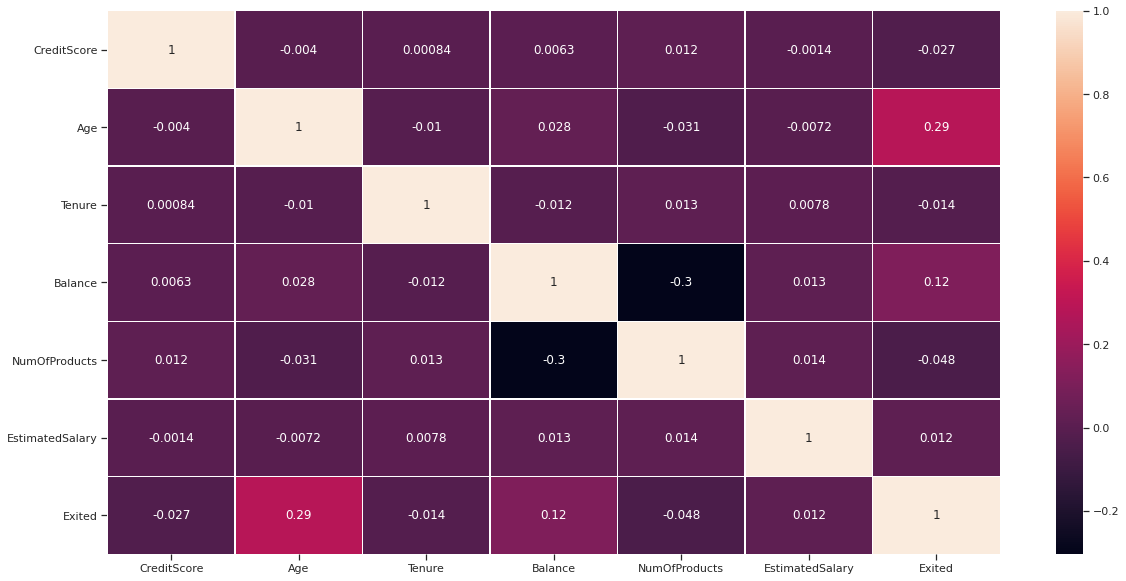

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap((df.loc[:, ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Exited',]]).corr(),
            annot=True,linewidths=.5);

**Data Exploration**

This section is the core part of understanding the problem and channel late to right features, as said before we need to establish possible relations in our attributes and this is where to strongest part of trading off comes in to secure the best predictions.

Note:** Exited** will always play the role of a target

In [33]:
lab = df["Exited"].value_counts().keys().tolist()
val = df["Exited"].value_counts().values.tolist()
trace = go.Pie(labels = lab ,values = val ,marker = dict(colors =  [ 'royalblue' ,'lime'],line = dict(color = "white") ))
layout = go.Layout(dict(title = "Customer churn", plot_bgcolor  = "rgb(243,243,243)",paper_bgcolor = "rgb(243,243,243)",))
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

Text(0, 0.5, 'count')

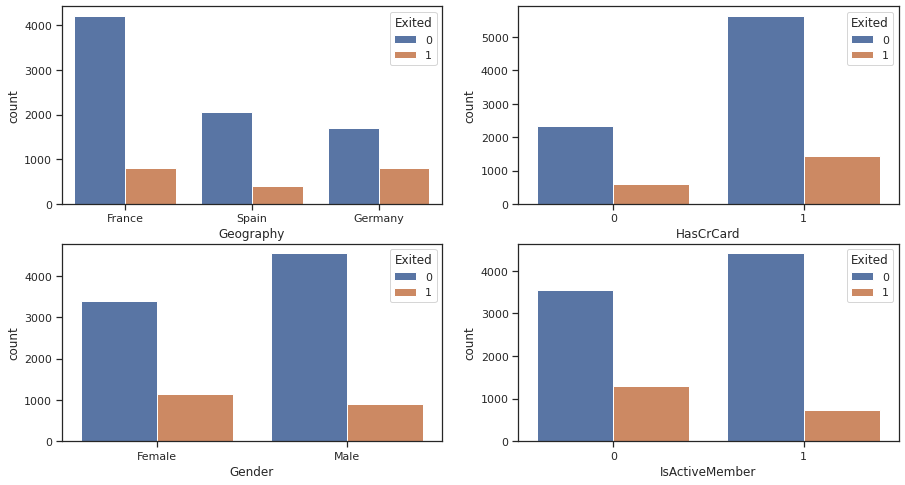

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
sns.countplot(x= df.Geography, hue = 'Exited' ,data=df, ax =axs[0][0])
sns.countplot(x=df.Gender, hue = 'Exited' ,data=df, ax=axs[1][0])
sns.countplot(x=df.HasCrCard, hue = 'Exited' ,data=df, ax=axs[0][1])
sns.countplot(x=df.IsActiveMember, hue = 'Exited' ,data=df, ax=axs[1][1])
plt.ylabel('count')

# **Continous attributes churn rate**
For continuous attribute i will have to normalize its values in order to compare its churn it won't be possible to plot Balance and age in the same plot yet they have very different figures.

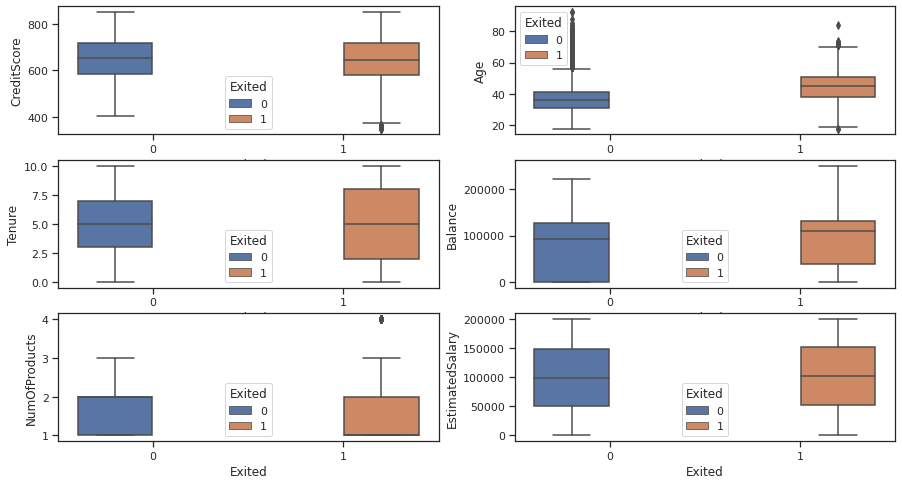

In [16]:
fig, axarr = plt.subplots(3, 2, figsize=(15, 8))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

**Feature Engineering and Preparation**

We are going to create new features from what we have and based on the relationship of attributes and prepare the existing ones to be ready to predict our next client possibly to churn and these stage is normally standardize head to head attributes as decided, for balance and Estmatedsalary this is quantitative relation then we will find its ratio and for tenure and creditscore over age .

In [17]:
df1['BalanceEstimatedSalaryRatio'] = df1.Balance/(df1.EstimatedSalary)
df1['TenureOverAge'] = df1.Tenure/(df1.Age)
df1['CreditScoreOverAge'] = df1.CreditScore/(df1.Age)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,BalanceEstimatedSalaryRatio,TenureOverAge,CreditScoreOverAge
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0,0.000000,0.047619,14.738095
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,0.744677,0.024390,14.829268
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0,1.401375,0.190476,11.952381
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0,0.000000,0.025641,17.923077
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0,1.587055,0.046512,19.767442


training and testing 

In [20]:
con_v=['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary','BalanceEstimatedSalaryRatio','TenureOverAge','CreditScoreOverAge']
minVec = df1[con_v].min().copy()
maxVec = df1[con_v].max().copy()
df1[con_v] = (df1[con_v]-minVec)/(maxVec-minVec)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,BalanceEstimatedSalaryRatio,TenureOverAge,CreditScoreOverAge
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0,0.000000,0.085714,0.235083
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0,0.000070,0.043902,0.237252
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0,0.000132,0.342857,0.168807
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0,0.000000,0.046154,0.310859
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0,0.000150,0.083721,0.354739


**Algorithms Modelling**

our dataset have 20.4% on churned customers this means we will try to predict , thats why i selected to use default test_train_split model which deliver 25% test set and 75% traing set.

In [21]:
from sklearn.model_selection import train_test_split
y = df1['Exited'].values
x = df1.drop(columns = ['Exited'])
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)

**Logistic Regression**

Scaling all the variables to a range of 0 to 1

In [22]:
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

Running logistic regression model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
result = model.fit(x_train, y_train)
prediction_test = model.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8148


getting the weights of all the variables on regression model

Age                            2.005537
CreditScore                    0.827838
BalanceEstimatedSalaryRatio    0.694128
Balance                        0.611464
Geography_Germany              0.512208
Gender_Female                  0.265856
Tenure                         0.188147
EstimatedSalary                0.134363
HasCrCard                     -0.018157
Geography_Spain               -0.204721
Gender_Male                   -0.284421
Geography_France              -0.326052
NumOfProducts                 -0.474759
IsActiveMember                -0.961916
TenureOverAge                 -1.122793
CreditScoreOverAge            -4.410565
dtype: float64

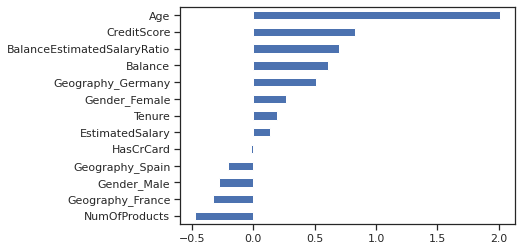

In [24]:
weights = pd.Series(model.coef_[0],
                 index=x.columns.values)
weights.sort_values()[-13:].plot(kind = 'barh')
weights.sort_values(ascending = False)

**Random** **Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(x_train, y_train)
prediction_test = model_rf.predict(x_test)
probs = model_rf.predict_proba(x_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8704


Age                            0.297883
NumOfProducts                  0.273113
CreditScoreOverAge             0.128362
IsActiveMember                 0.081551
Geography_Germany              0.053237
Balance                        0.046357
BalanceEstimatedSalaryRatio    0.028751
CreditScore                    0.023871
TenureOverAge                  0.022298
EstimatedSalary                0.012860
Geography_France               0.008719
Gender_Female                  0.006922
Gender_Male                    0.006596
Tenure                         0.005171
Geography_Spain                0.003708
HasCrCard                      0.000602
dtype: float64

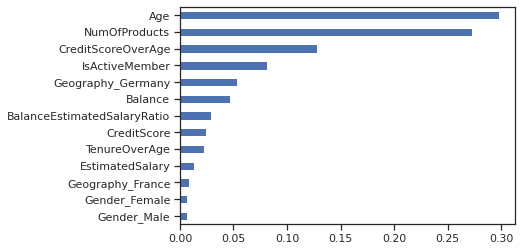

In [26]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=x.columns.values)
weights.sort_values()[-13:].plot(kind = 'barh')
weights.sort_values(ascending = False)

**Support Vector Machine**

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
model.svm = SVC(kernel='linear') 
model.svm.fit(x_train,y_train)
preds = model.svm.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.7964

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifiers = [
    KNeighborsClassifier(5),    
]
# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    # Create classifier, train it and test it.
    clf = item
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    score = clf.score(x_test, y_test)
    print (round(score,3),"\n", "- - - - - ", "\n") # Print the prediction accuracy

KNeighborsClassifier
0.825 
 - - - - -  



**Model testing and validate on testing data**

Here i will provide first customers to churn as per our model predictions and we provide a risky dataframe which include a column(pro_true) for those to probably churning.

In [29]:
x_test["pro_true"] = prediction_test
df1_risky = x_test[x_test["pro_true"] > 0.9]
display(df1_risky.head()[["pro_true"]])

,pro_true
8225,1
3497,1
3724,1
6734,1
2932,1


In [30]:
df1_risky.shape

(283, 17)

In [31]:
df1_risky.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,BalanceEstimatedSalaryRatio,TenureOverAge,CreditScoreOverAge,pro_true
8225,0.640,0.527027,0.3,0.699790,0.333333,1,0,0.495298,0,0,1,1,0,0.000167,0.094737,0.164096,1
3497,0.212,0.608108,0.1,0.659035,0.333333,0,0,0.703800,1,0,0,1,0,0.000111,0.028571,0.056647,1
3724,0.844,0.445946,0.9,0.573663,0.000000,0,1,0.233342,0,1,0,1,0,0.000291,0.317647,0.244580,1
6734,0.538,0.500000,0.0,0.000000,0.666667,0,0,0.304024,1,0,0,1,0,0.000000,0.000000,0.152204,1
2932,0.676,0.486486,0.9,0.000000,0.000000,1,0,0.956097,1,0,0,1,0,0.000000,0.300000,0.187563,1
